###### We want to study the dynamics near the point where the critical fequency (for the variability) is reach, especially when variability begin to decrease.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
exec(open("object.py").read(), globals())
exec(open("variability.py").read(), globals())

<Figure size 1200x600 with 1 Axes>

<Figure size 640x480 with 1 Axes>

# Times series near the critical point

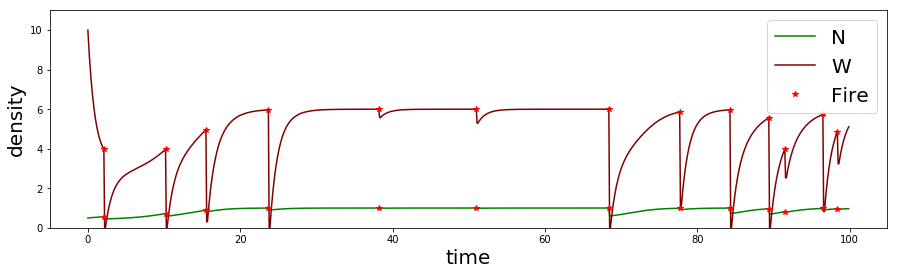

The variability of the times series above is  2.3435483226196365


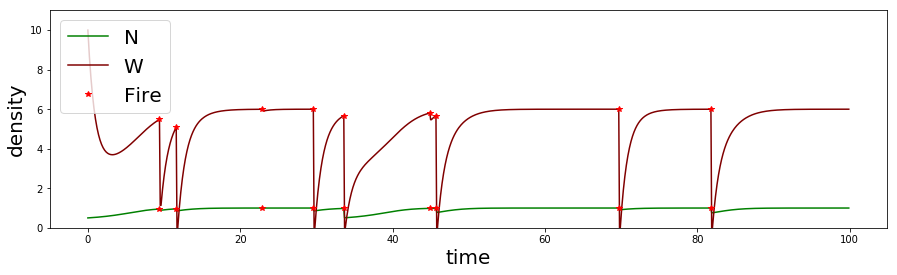

The variability of the times series above is  1.8048941426089709


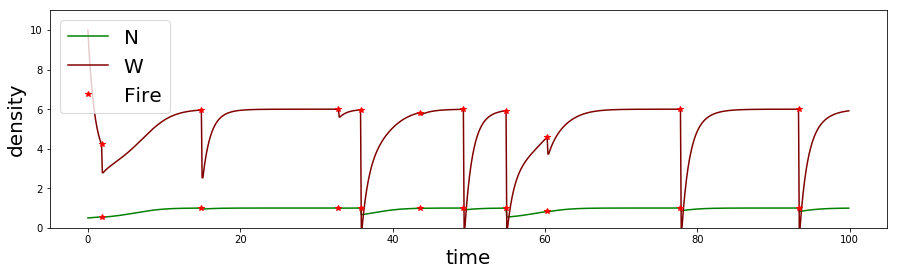

The variability of the times series above is  1.6339677526619345


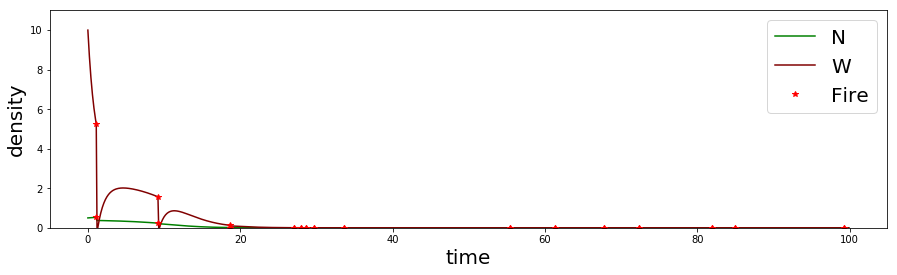

The variability of the times series above is  0.07571091859151662


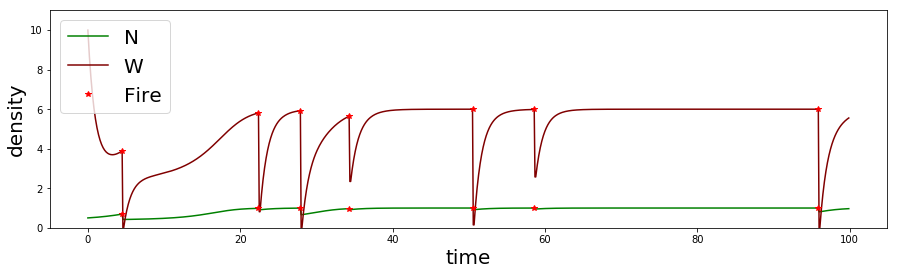

The variability of the times series above is  1.9784142030740934


In [2]:
Param_phy= [0.4, 6.]      # 0.2, 10
      
#Init = [0.5, Param_phy[1]]
Init = [0.5, 10.]

Param_freq = {"p":  0.1} #2
dt = 0.1
finalTime = 100
Param_strength = {"scale":0.0005} # 0.0008
Param_coupled = {"alpha":50, # 20
                 "beta":70} # 500


Fire_param = {"model": "coupled",
                "frequence": "bernoulli",
                "param_freq" : Param_freq,
                "amplitude": "exponential",
                "Param_strength" : Param_strength,
                "Param_coupled" : Param_coupled,
                "type" : "proportionnal",
                "coef_W_N" : 5}


for i in range(5):
    plt.figure(figsize = (15, 4))
    O = Ode(model = "allee_effect_adi", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt, Fire_param = Fire_param)
    O.solve_by_part()
    O.plot_time_series(generation=True, show = False)
    plt.show()
    print("The variability of the times series above is ", variability_10([O.N, O.W]))

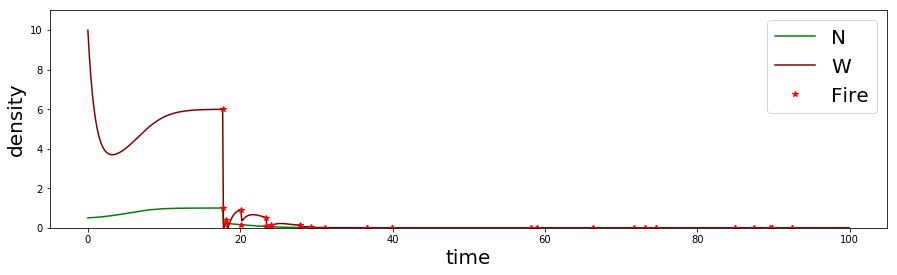

The variability of the times series above is  6.394736957332361


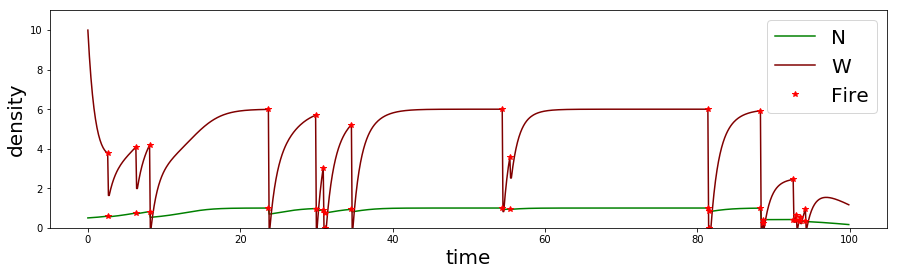

The variability of the times series above is  3.5059195524471014


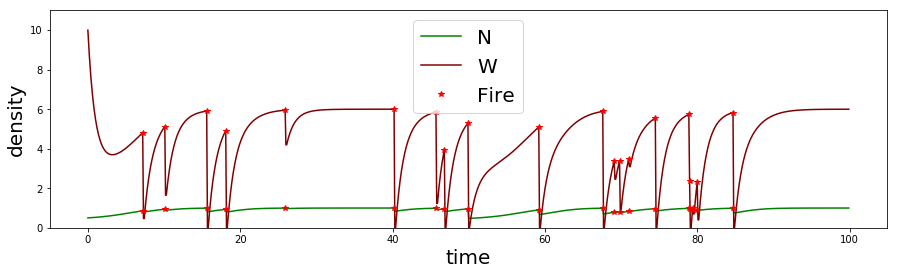

The variability of the times series above is  2.5860877873709014


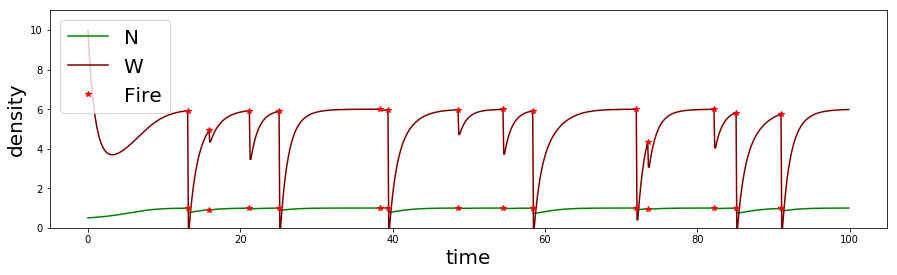

The variability of the times series above is  1.6594180286375448


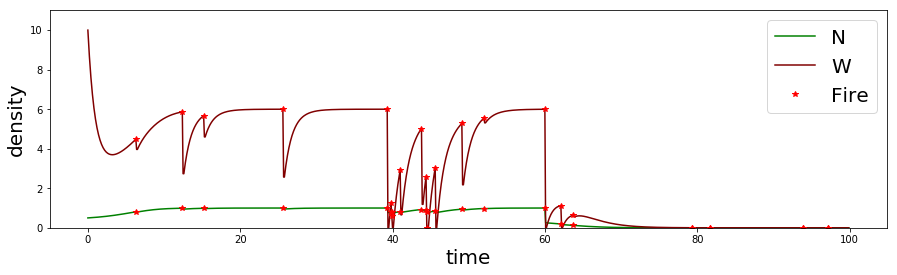

The variability of the times series above is  5.08840296923745


In [3]:
Param_phy= [0.4, 6.]      # 0.2, 10
      
#Init = [0.5, Param_phy[1]]
Init = [0.5, 10.]

Param_freq = {"p":  0.2} #2
dt = 0.1
finalTime = 100
Param_strength = {"scale":0.0005} # 0.0008
Param_coupled = {"alpha":50, # 20
                 "beta":70} # 500


Fire_param = {"model": "coupled",
                "frequence": "bernoulli",
                "param_freq" : Param_freq,
                "amplitude": "exponential",
                "Param_strength" : Param_strength,
                "Param_coupled" : Param_coupled,
                "type" : "proportionnal",
                "coef_W_N" : 5}


for i in range(5):
    plt.figure(figsize = (15, 4))
    O = Ode(model = "allee_effect_adi", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt, Fire_param = Fire_param)
    O.solve_by_part()
    O.plot_time_series(generation=True, show = False)
    plt.show()
    print("The variability of the times series above is ", variability_10([O.N, O.W]))

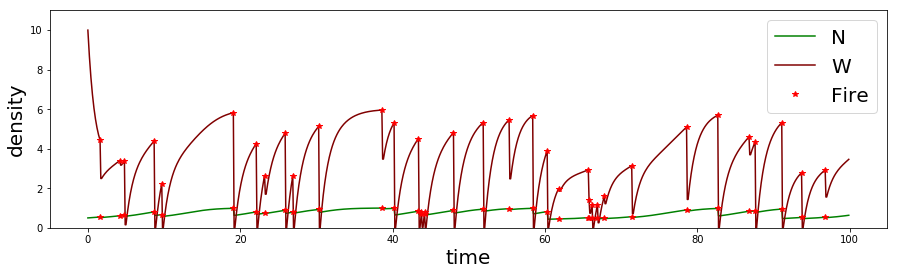

The variability of the times series above is  2.7005386307675896


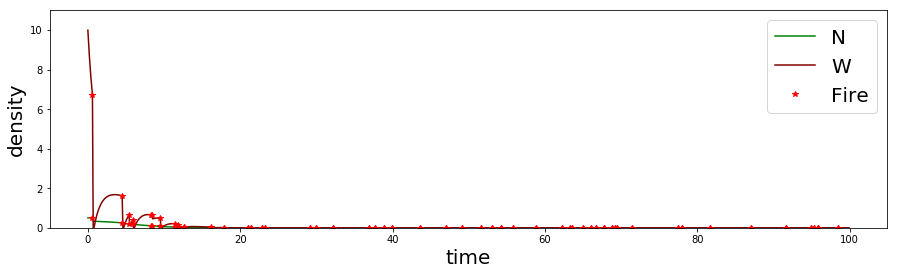

The variability of the times series above is  0.0027041450636126675


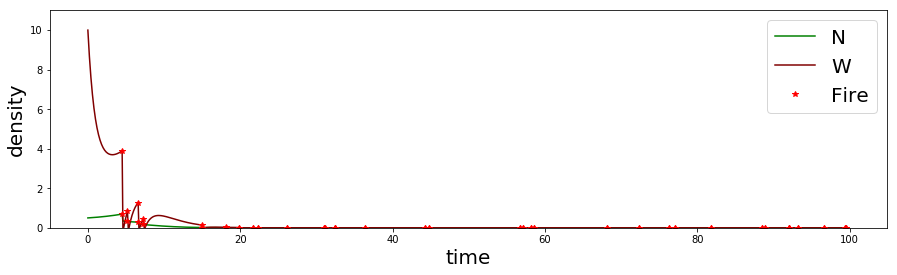

The variability of the times series above is  0.024064740609447258


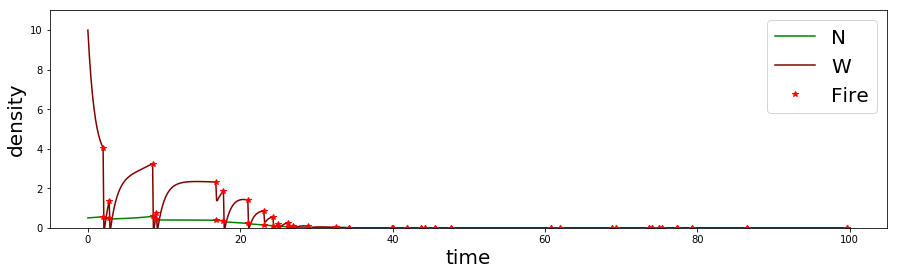

The variability of the times series above is  0.7533780150784932


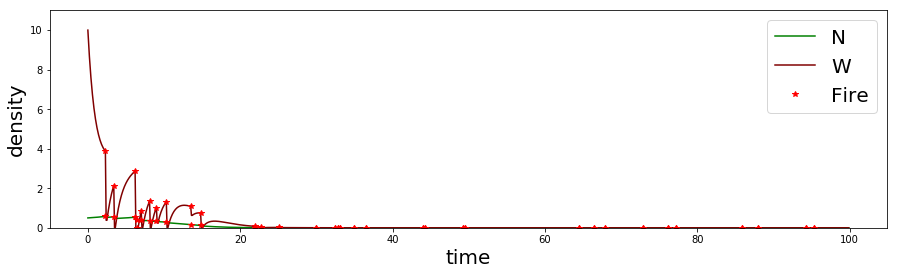

The variability of the times series above is  0.12233997889257157


In [4]:
Param_phy= [0.4, 6.]      # 0.2, 10
      
#Init = [0.5, Param_phy[1]]
Init = [0.5, 10.]

Param_freq = {"p":  0.4} #2
dt = 0.1
finalTime = 100
Param_strength = {"scale":0.0005} # 0.0008
Param_coupled = {"alpha":50, # 20
                 "beta":70} # 500


Fire_param = {"model": "coupled",
                "frequence": "bernoulli",
                "param_freq" : Param_freq,
                "amplitude": "exponential",
                "Param_strength" : Param_strength,
                "Param_coupled" : Param_coupled,
                "type" : "proportionnal",
                "coef_W_N" : 5}


for i in range(5):
    plt.figure(figsize = (15, 4))
    O = Ode(model = "allee_effect_adi", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt, Fire_param = Fire_param)
    O.solve_by_part()
    O.plot_time_series(generation=True, show = False)
    plt.show()
    print("The variability of the times series above is ", variability_10([O.N, O.W]))

# Contribution of a times series in the average variability

In [37]:
Number_of_simulation = 20
ind = np.arange(Number_of_simulation)
NumberPoint = 10

Freq = [0.001, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6, 2]
Var = np.zeros((len(Freq), NumberPoint, Number_of_simulation))

for j, freq in enumerate(Freq):    
    Param_freq = {"p":  freq}
    Fire_param["param_freq"] = Param_freq
    for i in range(NumberPoint):
        Collapse, Variability_always, Variability_until, Variability_only, Variability_10, Collapse_10_b, Collapse_10_m, Variability_half, Speed_collapse, Viability, Ratio, Point, Time_rotation_N, Time_rotation_W = all_measure(Number_of_simulation = Number_of_simulation, mean = False, finalTime = finalTime, Fire_param = Fire_param, dt = dt, Param_phy=Param_phy, Init=Init)
        Var[j, i] = np.sort(Variability_10)

C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:273: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:166: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:143: RuntimeWarning: invalid value encountered in less


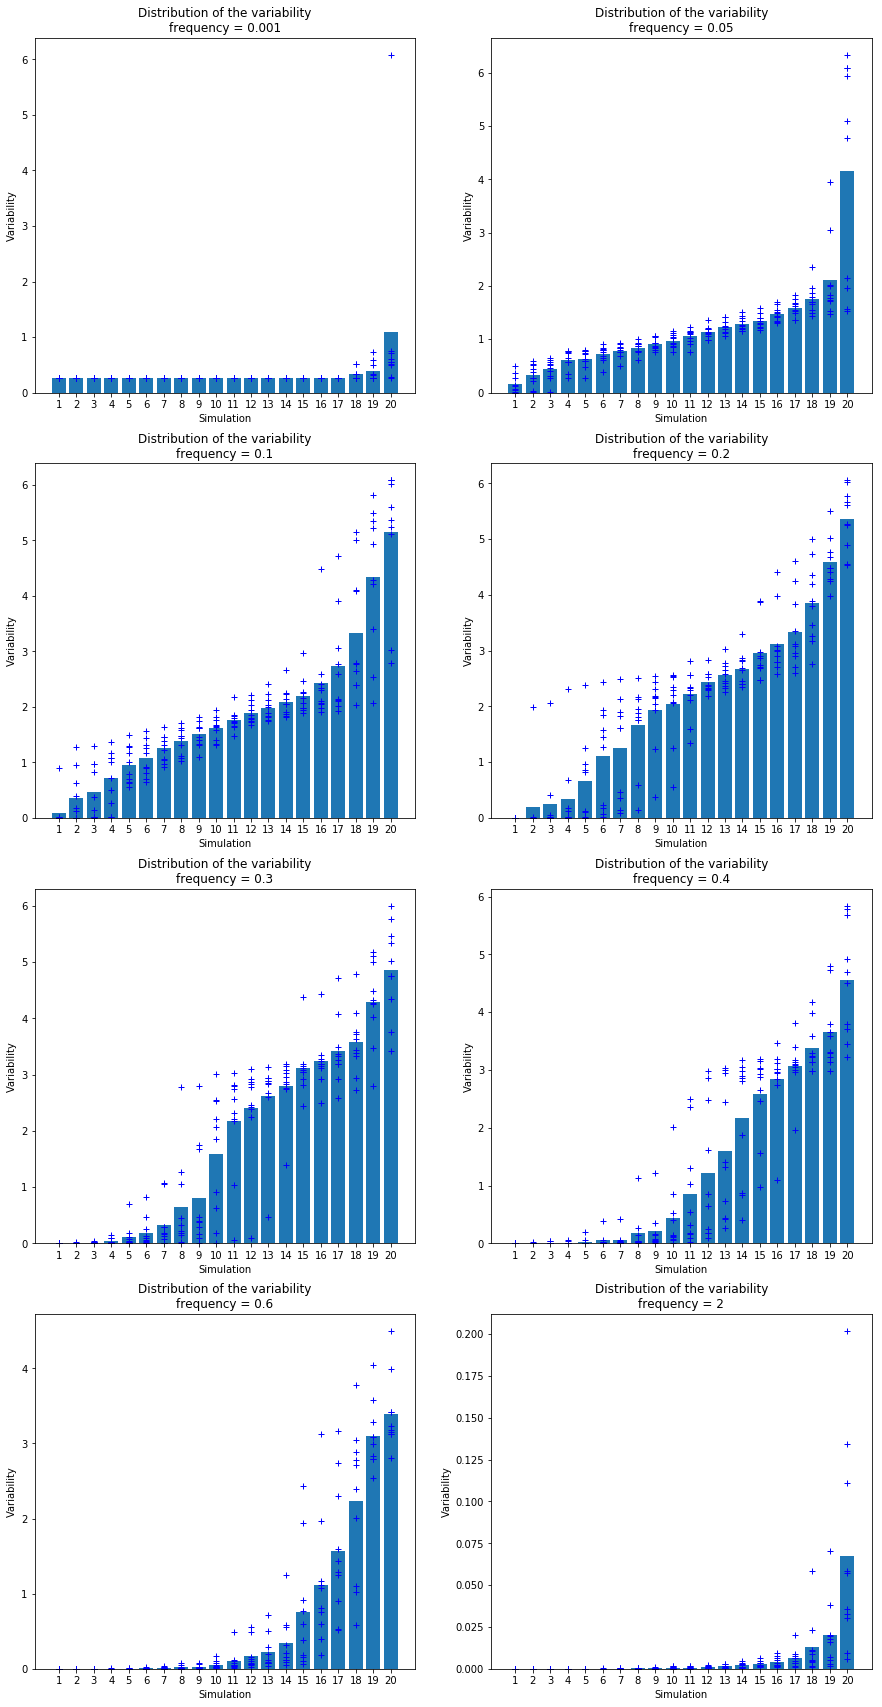

In [38]:
plt.figure(figsize = (15, 30))
for j, freq in enumerate(Freq):
    plt.subplot(4,2,j+1)
    for i in range(NumberPoint):
        plt.plot(ind, Var[j, i], "+", color = "blue")
    plt.bar(ind, np.mean(Var[j], axis = 0))
    plt.title("Distribution of the variability\nfrequency = "+str(freq))
    plt.ylabel("Variability")
    plt.xlabel("Simulation")
    plt.xticks(ind, ind+1)
plt.show()

### Boxplot

In [53]:
Freq_label = []
for freq in Freq:
    Freq_label += [str(freq)]

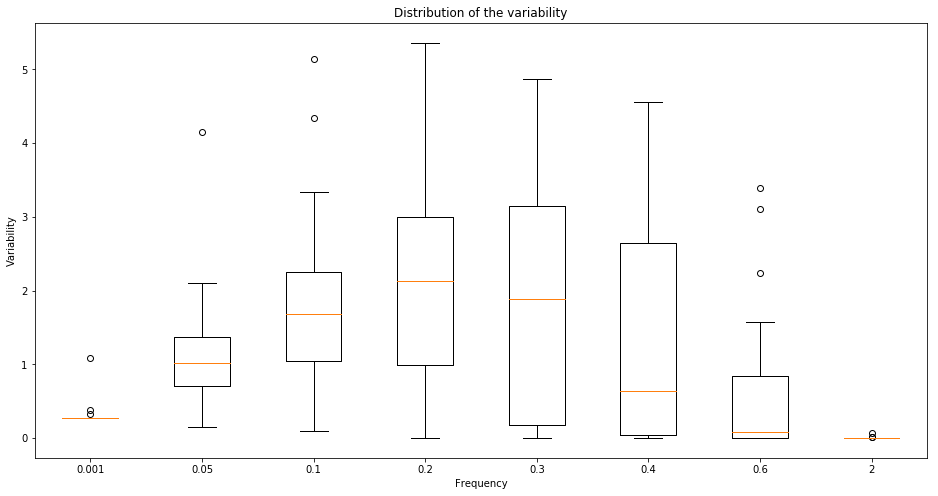

In [54]:
plt.figure(figsize = (16, 8))
plt.boxplot(np.mean(Var, axis = 1).transpose(), labels=Freq_label)
plt.xlabel("Frequency")
plt.ylabel("Variability")
plt.title("Distribution of the variability")
plt.show()